In [110]:
import numpy as np
import scipy.signal as sp
import matplotlib.pyplot as plt

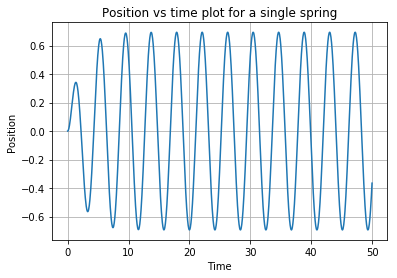

In [111]:
num = np.poly1d([1,0.5])   # numerator polynomial
den = np.polymul([1,1,2.5],[1,0,2.25]) # denominator polynomial
X1 = sp.lti(num,den)    # The polynomial fraction is converted to a frequency domain representation
t = np.linspace(0.0,50.0,1001)  # The range of time is declared
t,x1 = sp.impulse(X1,None,t)   # The output is found as inverse laplace transform of X
plt.plot(t,x1)   # Output is plotted
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Position vs time plot for a single spring')
plt.grid()
plt.show()

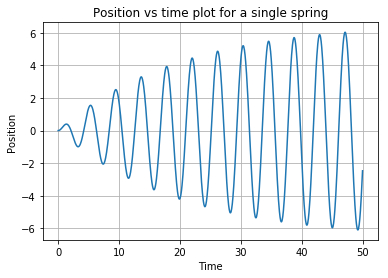

In [112]:
num = np.poly1d([1, 0.05])
den = np.polymul([1, 0.1, 2.2525],[1,0,2.25])
X2 = sp.lti(num,den)    # The polynomial fraction is converted to a frequency domain representation
t = np.linspace(0.0,50.0,1001)  # The range of time is declared
t,x2 = sp.impulse(X2,None,t)   # The output is found as inverse laplace transform of X
plt.plot(t,x2)   # Output is plotted
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Position vs time plot for a single spring')
plt.grid()
plt.show()

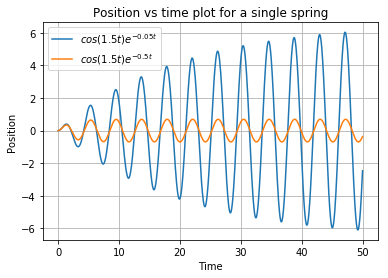

In [113]:
plt.plot(t,x2)   
plt.plot(t,x1)  
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Position vs time plot for a single spring')
plt.legend(('$cos(1.5t)e^{-0.05t}$','$cos(1.5t)e^{-0.5t}$'))
plt.grid()
plt.show()

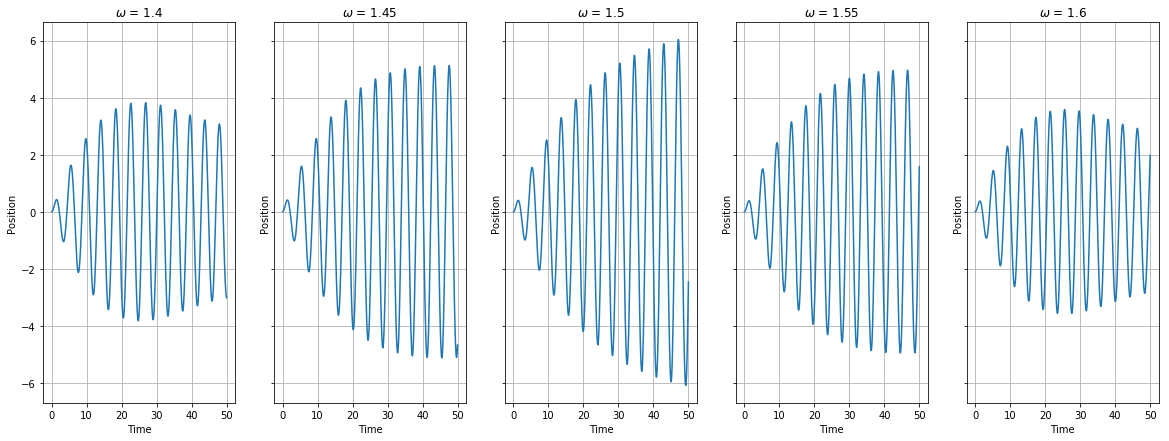

In [114]:
fig, axes = plt.subplots(1, 5, figsize=(20, 7), sharey = True)  # Plot all 5 in 5 subplots with a common y - axis, so that relative magnitude can be compared easily
i = 0
for w in np.linspace(1.4,1.6,5):   # Loop started
    num = np.poly1d([1])           # Numerator of transfer function
    den = np.poly1d([1,0,2.25])    # Denominator of tranfer functioin
    H = sp.lti(num,den)            # Transfer function calculated
    t = np.linspace(0.0,50.0,1001)  # Time range for graph
    f = np.cos(w*t)*np.exp(-0.05*t)  # Forcing function ( in time domain )
    t,y,svec=sp.lsim(H,f,t)        # Output wave found as convolution of forcing function and impulse response
    axes[i].plot(t,y)    # Graph plotted
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Position')
    axes[i].set_title('$\omega$ = ' + str(w))
    axes[i].grid()
    i = i+1
# plt.legend(('$\omega$ = 1.4','$\omega$ = 1.45','$\omega$ = 1.5','$\omega$ = 1.55','$\omega$ = 1.6'))
plt.show()

In [115]:
num = np.poly1d([1, 0, 2, 0])   # Numerator of X(s)
den = np.poly1d([1, 0, 3, 0, 0])  # Denominator of X(s)
X = sp.lti(num,den)              # X(s) calculated
t,x = sp.impulse(X,None,T=np.linspace(0,20,1001))  # Time range for x plot

num = np.poly1d([2, 0]) # Numerator of Y(s)  
den = np.poly1d([1,0,3,0,0])    # Denominator of Y(s)
Y = sp.lti(num,den)         # Y(s) calculated
t,y = sp.impulse(Y,None,T=np.linspace(0,20,1001))  # Time range for y plot

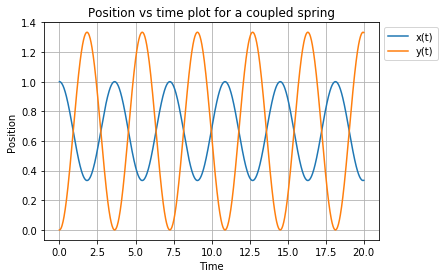

In [116]:
plt.plot(t,x)
plt.plot(t,y)
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Position vs time plot for a coupled spring')
plt.legend(('x(t)','y(t)'),bbox_to_anchor=(1, 1))
plt.grid()
plt.show()

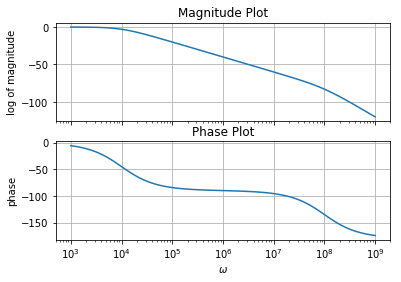

In [117]:
num = np.poly1d([1])    # Numerator of transfer function
den = np.poly1d([10**(-12),10**(-4),1])   # Calculated denominator of transfer function
H = sp.lti(num,den)
w,S,phi=H.bode()   # Bode plot values calculated

fig, axes = plt.subplots(2, 1, sharex = True)  # A 2 x 1 subplot array is defined with common x-axis
axes[0].semilogx(w,S)
axes[0].set_ylabel('log of magnitude')
axes[0].set_title('Magnitude Plot')
axes[0].grid()

axes[1].semilogx(w,phi)
axes[1].set_xlabel('$\omega$')
axes[1].set_ylabel('phase')
axes[1].set_title('Phase Plot')
axes[1].grid()
plt.show()

In [147]:
t = np.linspace(0,10*(10**(-3)),100001)   # Time is taken till 10ms with 0.1us step-size
v_i = np.cos((10**3)*t) - np.cos((10**6)*t)  # Input signal is defined
time,v_0,vsec = sp.lsim(H,v_i,t)   # Output signal y found

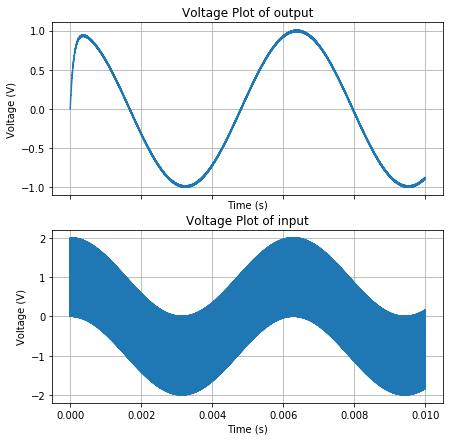

In [148]:
fig, axes = plt.subplots(2, 1, figsize=(7, 7), sharex = True)  # A 2 x 1 subplot array is defined with common x- and y- axes
axes[0].plot(time,v_0)
axes[0].set_ylabel('Voltage (V)')
axes[0].set_title('Voltage Plot of output')
axes[0].set_xlabel('Time (s)')
axes[0].grid()

axes[1].plot(time,v_i)
axes[1].set_ylabel('Voltage (V)')
axes[1].set_title('Voltage Plot of input')
axes[1].set_xlabel('Time (s)')
axes[1].grid()
plt.show()